https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average


### 1. Importa el csv "temps.csv"

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor

In [2]:
df = pd.read_csv('data/temps.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


### 2. Lidia con las variables categóricas del dataset

In [4]:
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [5]:
df.index = pd.to_datetime(df['year'].astype(str) + '/' + df['month'].astype(str) + '/' + df['day'].astype(str))

df['date'] = df['year'].astype(str) + '/' + df['month'].astype(str) + '/' + df['day'].astype(str)
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].astype('int64') // 10**11
df.head()

C:\Users\alber\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  """


,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,date
2016-01-01,2016,1,1,Fri,45,45,45.6,45,43,50,44,29,14516064
2016-01-02,2016,1,2,Sat,44,45,45.7,44,41,50,44,61,14516928
2016-01-03,2016,1,3,Sun,45,44,45.8,41,43,46,47,56,14517792
2016-01-04,2016,1,4,Mon,44,41,45.9,40,44,48,46,53,14518656
2016-01-05,2016,1,5,Tues,41,40,46.0,44,46,46,46,41,14519520


In [6]:
X = df.copy()
y = df['actual'].copy()
# 'year', 'month', 'day', 
try:
    X.drop(columns=['forecast_noaa', 'forecast_acc', 
                        'forecast_under', 'friend', 'week', 'actual', 'date'], 
            inplace=True)
except KeyError:
    pass

In [7]:
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,date
2016-01-01,2016,1,1,Fri,45,45,45.6,45,43,50,44,29,14516064
2016-01-02,2016,1,2,Sat,44,45,45.7,44,41,50,44,61,14516928
2016-01-03,2016,1,3,Sun,45,44,45.8,41,43,46,47,56,14517792
2016-01-04,2016,1,4,Mon,44,41,45.9,40,44,48,46,53,14518656
2016-01-05,2016,1,5,Tues,41,40,46.0,44,46,46,46,41,14519520


In [8]:
X.head()

,year,month,day,temp_2,temp_1,average
2016-01-01,2016,1,1,45,45,45.6
2016-01-02,2016,1,2,44,45,45.7
2016-01-03,2016,1,3,45,44,45.8
2016-01-04,2016,1,4,44,41,45.9
2016-01-05,2016,1,5,41,40,46.0


### 3. Divide en train y test

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=False)

In [10]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(278, 6)
(70, 6)
(278,)
(70,)


In [12]:
# X_train.date.max() < X_test.date.min()

### 4. Entrena el modelo
Utiliza un DecisionTreeRegressor

In [13]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [14]:
y_hat = model.predict(X_test)

### 5. Calcula su MAE
Sin usar sklearn

In [15]:
mae_tr = np.mean(np.abs(y_train - model.predict(X_train)))
print('El MAE del TRAIN es de {:.2f}ºC'.format(mae_tr))

El MAE del TRAIN es de 0.00ºC


In [16]:
mae = np.mean(np.abs(y_test - y_hat))
print('El MAE es de {:.2f}ºC'.format(mae))

El MAE es de 4.94ºC


### 6. Calcula su MAPE
Sin usar sklearn

In [17]:
mape = np.mean(np.abs(y_test - y_hat) / np.abs(y_test))
print('El MAPE es de {:.2%}'.format(mape))

El MAPE es de 9.91%


### 7. Representa el árbol de decision

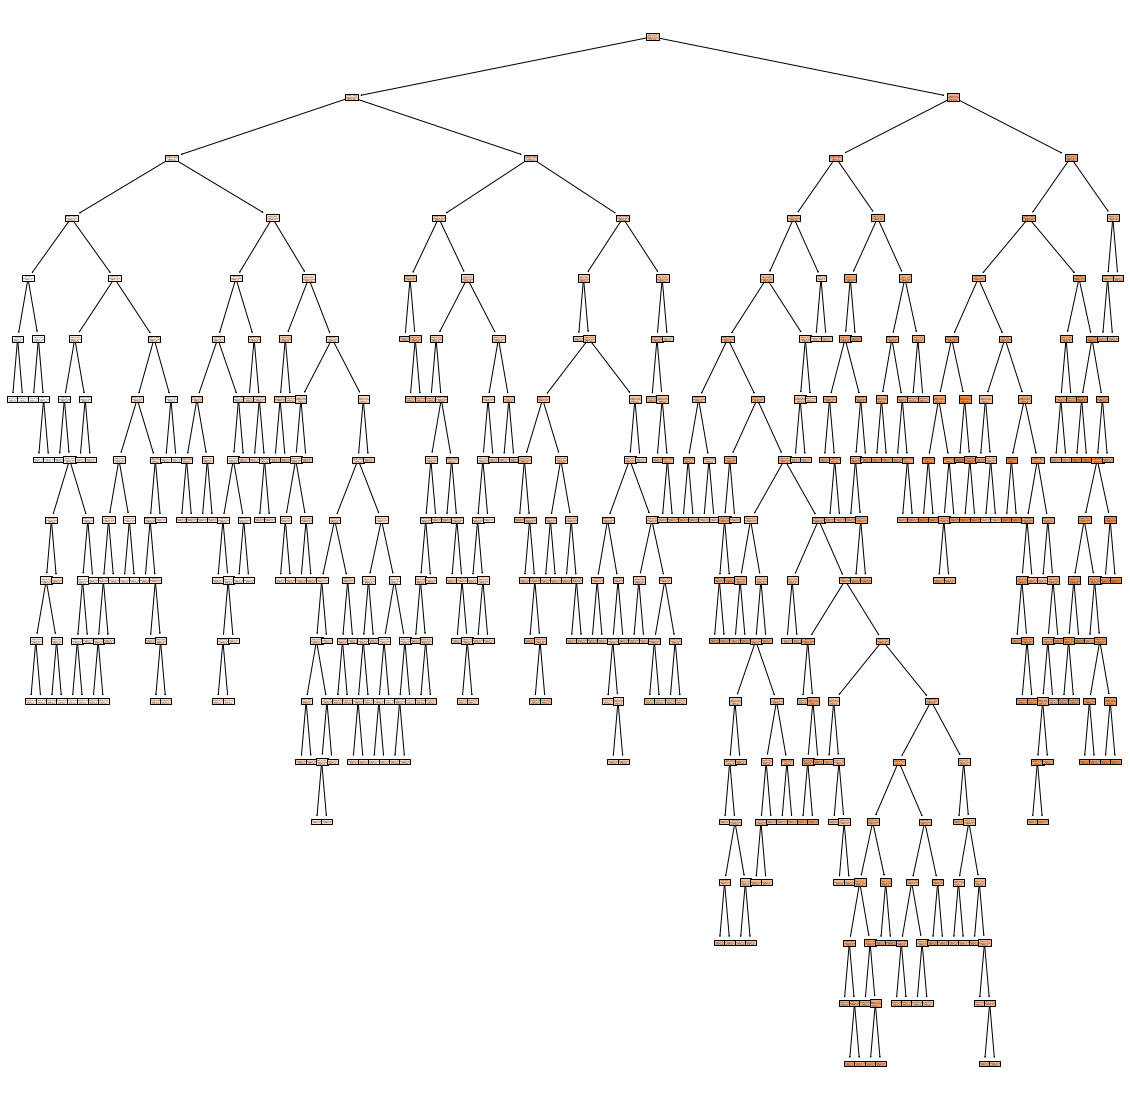

In [18]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))

plot_tree(model,
            class_names=y_train.values,
            feature_names=X.columns,
            filled = True);

### 8. Modifica el max_depth a 3 y vuelve a entrenarlo

In [19]:
model_md3 = DecisionTreeRegressor(max_depth=3)
model_md3.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [20]:
y_hat_md3 = model_md3.predict(X_test)

### 9. Vuelve a calcular si MAE

In [21]:
mae_tr = np.mean(np.abs(y_train - model_md3.predict(X_train)))
print('El MAE del TRAIN es de {:.2f}ºC'.format(mae_tr))

El MAE del TRAIN es de 3.60ºC


In [22]:
(y_test - y_hat_md3).abs().mean()

5.173684396976671

### 10. Vuelve a representar su árbol

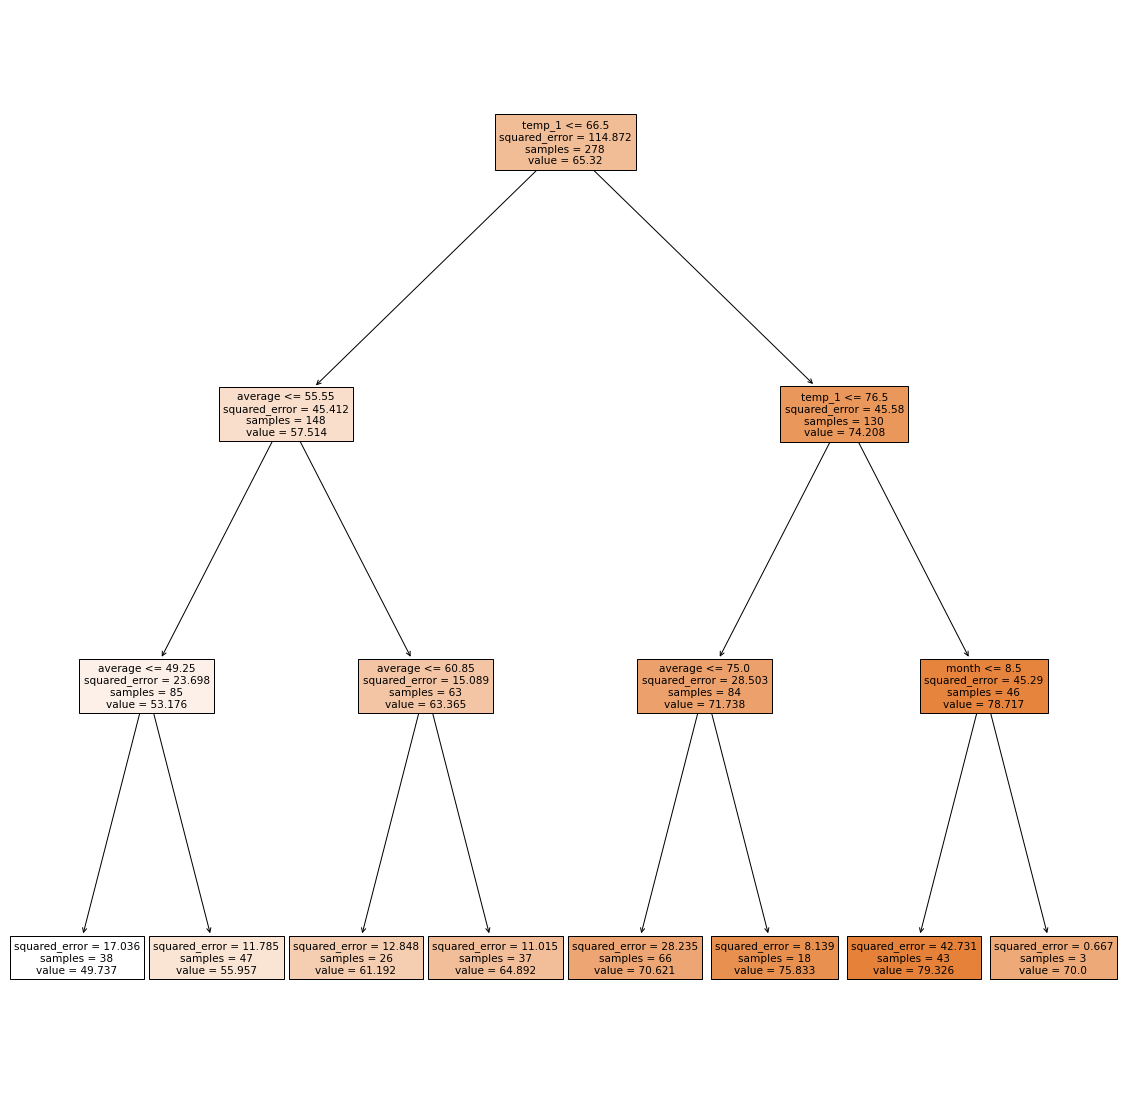

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))

plot_tree(model_md3,
            class_names='actual',
            feature_names=X.columns,
            filled = True);

### 10. Obten el `feature_importances` de cada variable en el último modelo

<BarContainer object of 6 artists>

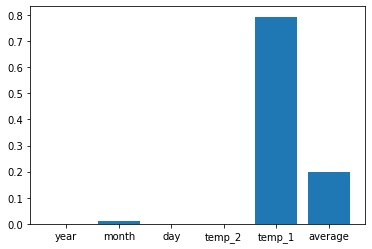

In [24]:
plt.bar(X.columns, model_md3.feature_importances_)

<BarContainer object of 6 artists>

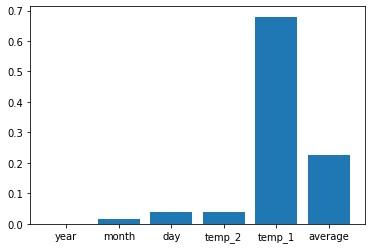

In [25]:
plt.bar(X.columns, model.feature_importances_)